<a href="https://colab.research.google.com/github/mabittar/FinancialData/blob/master/fundamental_analysis/Fundamentalist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get Fundamentalist data from internet?
### US: In this notebook it's show how to use a web crawler in python to scrapy data from fundamentus.com.br (braziliar website) and how to use it.
### PT: Nesse notebook será mostrado como obter dados do site fundamentus.com.br usando um robo e como tratar tais informações.

This example are part of my project, see all project in:
Esse exemplo é parte do meu projeto, veja o projeto completo em:

[Github](https://github.com/mabittar/FinancialData.git)


credits for:
[@Eudes Rodrigo](https://youtu.be/lvZ4cx4IKy0)

##Get IBOV compostion

In [0]:
#import relevant libraries

import pandas as pd
from google.colab import files

In [0]:
#Ler o arquivo CSV para obter as ações que compõe o Ibov, já informando que qtd está com decimal: ,
df = pd.read_csv("/content/composition_ibov.csv", sep=";", decimal=",") 
df = df.dropna(axis=0)

In [0]:
composicao = list(df['Ativo'])

##Some testes and format dataframe

In [4]:
base = pd.read_html("http://fundamentus.com.br/detalhes.php?papel=ABEV3", decimal=",", thousands=".")
print(base)

[           0                         1                2           3
0     ?Papel                     ABEV3         ?Cotação       11.34
1      ?Tipo                     ON NM    ?Data últ cot  30/04/2020
2   ?Empresa           AMBEV S/A ON NM      ?Min 52 sem       11.03
3     ?Setor                   Bebidas      ?Max 52 sem       20.18
4  ?Subsetor  Cervejas e Refrigerantes  ?Vol $ méd (2m)   438586000,                    0             1                        2            3
0  ?Valor de mercado  178436000000  ?Últ balanço processado   31/12/2019
1    ?Valor da firma  169584000000              ?Nro. Ações  15735100000,              0  ...                             5
0   Oscilações  ...  Indicadores fundamentalistas
1          Dia  ...                          0.75
2          Mês  ...                          3.89
3      30 dias  ...                         58,8%
4     12 meses  ...                         29,6%
5         2020  ...                         23,2%
6         2019  ... 

In [5]:
display(base[0])

,0,1,2,3
0,?Papel,ABEV3,?Cotação,11.34
1,?Tipo,ON NM,?Data últ cot,30/04/2020
2,?Empresa,AMBEV S/A ON NM,?Min 52 sem,11.03
3,?Setor,Bebidas,?Max 52 sem,20.18
4,?Subsetor,Cervejas e Refrigerantes,?Vol $ méd (2m),438586000


In [6]:
base[0] = base[0].transpose()
base[1] = base[1].transpose()
base[2] = base[2].transpose()
base[3] = base[3].transpose()
base[4] = base[4].transpose()

display(base[0], base[1], base[2], base[3], base[4])

,0,1,2,3,4
0,?Papel,?Tipo,?Empresa,?Setor,?Subsetor
1,ABEV3,ON NM,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes
2,?Cotação,?Data últ cot,?Min 52 sem,?Max 52 sem,?Vol $ méd (2m)
3,11.34,30/04/2020,11.03,20.18,438586000


,0,1
0,?Valor de mercado,?Valor da firma
1,178436000000,169584000000
2,?Últ balanço processado,?Nro. Ações
3,31/12/2019,15735100000


,0,1,2,3,4,5,6,7,8,9,10,11
0,Oscilações,Dia,Mês,30 dias,12 meses,2020,2019,2018,2017,2016,2015,NaN
1,Oscilações,"-2,83%","-4,87%","-9,64%","-37,24%","-39,26%","24,08%","-25,59%","33,10%","-4,96%","13,71%",NaN
2,Indicadores fundamentalistas,?P/L,?P/VP,?P/EBIT,?PSR,?P/Ativos,?P/Cap. Giro,?P/Ativ Circ Liq,?Div. Yield,?EV / EBITDA,?EV / EBIT,?Cres. Rec (5a)
3,Indicadores fundamentalistas,15.15,2.91,11.44,3.39,1.75,68.36,-15.43,"4,3%",8.43,10.87,"3,4%"
4,Indicadores fundamentalistas,?LPA,?VPA,?Marg. Bruta,?Marg. EBIT,?Marg. Líquida,?EBIT / Ativo,?ROIC,?ROE,?Liquidez Corr,?Div Br/ Patrim,?Giro Ativos
5,Indicadores fundamentalistas,0.75,3.89,"58,8%","29,6%","23,2%","15,3%","20,6%","19,2%",1.10,0.05,0.52


,0,1,2,3
0,Dados Balanço Patrimonial,?Ativo,?Disponibilidades,?Ativo Circulante
1,Dados Balanço Patrimonial,101743000000,11915200000,27621100000
2,Dados Balanço Patrimonial,?Dív. Bruta,?Dív. Líquida,?Patrim. Líq
3,Dados Balanço Patrimonial,3062800000,-8852420000,61278000000


,0,1,2,3,4
0,Dados demonstrativos de resultados,Últimos 12 meses,?Receita Líquida,?EBIT,?Lucro Líquido
1,Dados demonstrativos de resultados,Últimos 12 meses,52599700000,15594000000,11780000000
2,Dados demonstrativos de resultados,Últimos 3 meses,?Receita Líquida,?EBIT,?Lucro Líquido
3,Dados demonstrativos de resultados,Últimos 3 meses,15856800000,5342540000,4099700000


In [7]:
informacoes_1 = base[0].iloc[:2, :]
informacoes_2 = base[0].iloc[2:, :]

informacoes_3 = base[1].iloc[:2, :]
informacoes_4 = base[1].iloc[2:, :]

display(informacoes_1, informacoes_2, informacoes_3, informacoes_4)

,0,1,2,3,4
0,?Papel,?Tipo,?Empresa,?Setor,?Subsetor
1,ABEV3,ON NM,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes


,0,1,2,3,4
2,?Cotação,?Data últ cot,?Min 52 sem,?Max 52 sem,?Vol $ méd (2m)
3,11.34,30/04/2020,11.03,20.18,438586000


,0,1
0,?Valor de mercado,?Valor da firma
1,178436000000,169584000000


,0,1
2,?Últ balanço processado,?Nro. Ações
3,31/12/2019,15735100000


In [8]:
informacoes_5 = base[2].iloc[2:4, 1:]
informacoes_6 = base[2].iloc[4:, 1:]

informacoes_7 = base[3].iloc[:2, 1:]
informacoes_8 = base[3].iloc[2:, 1:]

display(informacoes_5, informacoes_6, informacoes_7, informacoes_8)

,1,2,3,4,5,6,7,8,9,10,11
2,?P/L,?P/VP,?P/EBIT,?PSR,?P/Ativos,?P/Cap. Giro,?P/Ativ Circ Liq,?Div. Yield,?EV / EBITDA,?EV / EBIT,?Cres. Rec (5a)
3,15.15,2.91,11.44,3.39,1.75,68.36,-15.43,"4,3%",8.43,10.87,"3,4%"


,1,2,3,4,5,6,7,8,9,10,11
4,?LPA,?VPA,?Marg. Bruta,?Marg. EBIT,?Marg. Líquida,?EBIT / Ativo,?ROIC,?ROE,?Liquidez Corr,?Div Br/ Patrim,?Giro Ativos
5,0.75,3.89,"58,8%","29,6%","23,2%","15,3%","20,6%","19,2%",1.10,0.05,0.52


,1,2,3
0,?Ativo,?Disponibilidades,?Ativo Circulante
1,101743000000,11915200000,27621100000


,1,2,3
2,?Dív. Bruta,?Dív. Líquida,?Patrim. Líq
3,3062800000,-8852420000,61278000000


In [9]:
informacoes_9 = base[4].iloc[:2, 2:]
display(informacoes_9)

,2,3,4
0,?Receita Líquida,?EBIT,?Lucro Líquido
1,52599700000,15594000000,11780000000


In [0]:
informacoes_2 = informacoes_2.reset_index(drop=True)
informacoes_4 = informacoes_4.reset_index(drop=True)
informacoes_5 = informacoes_5.reset_index(drop=True)
informacoes_6 = informacoes_6.reset_index(drop=True)
informacoes_8 = informacoes_8.reset_index(drop=True)

In [11]:
base_ordenada = pd.concat([informacoes_1,informacoes_2, informacoes_3, informacoes_4, informacoes_5, informacoes_6, informacoes_7, informacoes_8, informacoes_9 ], axis=1, join="inner")
display(base_ordenada)

,0,1,2,3,4,0,1,2,3,4,0,1,0,1,1,2,3,4,5,6,7,8,9,10,11,1,2,3,4,5,6,7,8,9,10,11,1,2,3,1,2,3,2,3,4
0,?Papel,?Tipo,?Empresa,?Setor,?Subsetor,?Cotação,?Data últ cot,?Min 52 sem,?Max 52 sem,?Vol $ méd (2m),?Valor de mercado,?Valor da firma,?Últ balanço processado,?Nro. Ações,?P/L,?P/VP,?P/EBIT,?PSR,?P/Ativos,?P/Cap. Giro,?P/Ativ Circ Liq,?Div. Yield,?EV / EBITDA,?EV / EBIT,?Cres. Rec (5a),?LPA,?VPA,?Marg. Bruta,?Marg. EBIT,?Marg. Líquida,?EBIT / Ativo,?ROIC,?ROE,?Liquidez Corr,?Div Br/ Patrim,?Giro Ativos,?Ativo,?Disponibilidades,?Ativo Circulante,?Dív. Bruta,?Dív. Líquida,?Patrim. Líq,?Receita Líquida,?EBIT,?Lucro Líquido
1,ABEV3,ON NM,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes,11.34,30/04/2020,11.03,20.18,438586000,178436000000,169584000000,31/12/2019,15735100000,15.15,2.91,11.44,3.39,1.75,68.36,-15.43,"4,3%",8.43,10.87,"3,4%",0.75,3.89,"58,8%","29,6%","23,2%","15,3%","20,6%","19,2%",1.10,0.05,0.52,101743000000,11915200000,27621100000,3062800000,-8852420000,61278000000,52599700000,15594000000,11780000000


In [12]:
base_ordenada.columns = base_ordenada.iloc[0]
base_ordenada = base_ordenada.drop(0)
base_ordenada = base_ordenada.reset_index(drop=True)
base_ordenada

,?Papel,?Tipo,?Empresa,?Setor,?Subsetor,?Cotação,?Data últ cot,?Min 52 sem,?Max 52 sem,?Vol $ méd (2m),?Valor de mercado,?Valor da firma,?Últ balanço processado,?Nro. Ações,?P/L,?P/VP,?P/EBIT,?PSR,?P/Ativos,?P/Cap. Giro,?P/Ativ Circ Liq,?Div. Yield,?EV / EBITDA,?EV / EBIT,?Cres. Rec (5a),?LPA,?VPA,?Marg. Bruta,?Marg. EBIT,?Marg. Líquida,?EBIT / Ativo,?ROIC,?ROE,?Liquidez Corr,?Div Br/ Patrim,?Giro Ativos,?Ativo,?Disponibilidades,?Ativo Circulante,?Dív. Bruta,?Dív. Líquida,?Patrim. Líq,?Receita Líquida,?EBIT,?Lucro Líquido
0,ABEV3,ON NM,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes,11.34,30/04/2020,11.03,20.18,438586000,178436000000,169584000000,31/12/2019,15735100000,15.15,2.91,11.44,3.39,1.75,68.36,-15.43,"4,3%",8.43,10.87,"3,4%",0.75,3.89,"58,8%","29,6%","23,2%","15,3%","20,6%","19,2%",1.10,0.05,0.52,101743000000,11915200000,27621100000,3062800000,-8852420000,61278000000,52599700000,15594000000,11780000000


##Import all IBOV composition

In [0]:
consolidado = pd.DataFrame()

for cod_acao in composicao:
  #print("Busca informações sobre: ", cod_acao)
  base = pd.read_html("http://fundamentus.com.br/detalhes.php?papel=" + cod_acao, decimal=",", thousands=".")

  base[0] = base[0].transpose()
  base[1] = base[1].transpose()
  base[2] = base[2].transpose()
  base[3] = base[3].transpose()
  base[4] = base[4].transpose()

  informacoes_1 = base[0].iloc[:2, :]
  informacoes_2 = base[0].iloc[2:, :]

  informacoes_3 = base[1].iloc[:2, :]
  informacoes_4 = base[1].iloc[2:, :]

  informacoes_5 = base[2].iloc[2:4, 1:]
  informacoes_6 = base[2].iloc[4:, 1:]

  informacoes_7 = base[3].iloc[:2, 1:]
  informacoes_8 = base[3].iloc[2:, 1:]

  informacoes_9 = base[4].iloc[:2, 2:]

  informacoes_2 = informacoes_2.reset_index(drop=True)
  informacoes_4 = informacoes_4.reset_index(drop=True)
  informacoes_5 = informacoes_5.reset_index(drop=True)
  informacoes_6 = informacoes_6.reset_index(drop=True)
  informacoes_8 = informacoes_8.reset_index(drop=True)


  base_ordenada = pd.concat([informacoes_1,
                             informacoes_2, 
                             informacoes_3, 
                             informacoes_4, 
                             informacoes_5, 
                             informacoes_6, 
                             informacoes_7, 
                             informacoes_8, 
                             informacoes_9 ],
                             axis=1, join="inner")

  base_ordenada.columns = base_ordenada.iloc[0]
  base_ordenada = base_ordenada.drop(0)
  base_ordenada = base_ordenada.reset_index(drop=True)

  consolidado = consolidado.append(base_ordenada, sort=False)

In [14]:
#reset index for dataframe
consolidado = consolidado.reset_index(drop=True)

#change headers
new_header = [column.replace("?" , "") for column in consolidado.columns]
consolidado.columns = new_header

#Datetime correction
consolidado['Data últ cot'] = pd.to_datetime(consolidado['Data últ cot'], errors='ignore', format="%d/%m/%Y")
consolidado['Últ balanço processado'] = pd.to_datetime(consolidado['Últ balanço processado'], errors='ignore', format="%d/%m/%Y")

#numbers corrections
consolidado['Vol $ méd (2m)'] = pd.to_numeric(consolidado['Vol $ méd (2m)'], errors='coerce')
consolidado['Valor de mercado'] = pd.to_numeric(consolidado['Valor de mercado'], errors='coerce')
consolidado['Valor da firma'] = pd.to_numeric(consolidado['Valor da firma'], errors='coerce')
consolidado['Nro. Ações'] = pd.to_numeric(consolidado['Nro. Ações'], errors='coerce')
consolidado['Ativo'] = pd.to_numeric(consolidado['Ativo'], errors='coerce')
consolidado['Disponibilidades'] = pd.to_numeric(consolidado['Disponibilidades'], errors='coerce')
consolidado['Ativo Circulante'] = pd.to_numeric(consolidado['Ativo Circulante'], errors='coerce')
consolidado['Dív. Bruta'] = pd.to_numeric(consolidado['Dív. Bruta'], errors='coerce')
consolidado['Dív. Líquida'] = pd.to_numeric(consolidado['Dív. Líquida'], errors='coerce')
consolidado['Patrim. Líq'] = pd.to_numeric(consolidado['Patrim. Líq'], errors='coerce')
consolidado['Receita Líquida'] = pd.to_numeric(consolidado['Receita Líquida'], errors='coerce')
consolidado['Lucro Líquido'] = pd.to_numeric(consolidado['Lucro Líquido'], errors='coerce')
consolidado['Depósitos'] = pd.to_numeric(consolidado['Depósitos'], errors='coerce')
consolidado['Result Int Financ'] = pd.to_numeric(consolidado['Result Int Financ'], errors='coerce')
consolidado['Rec Serviços'] = pd.to_numeric(consolidado['Rec Serviços'], errors='coerce')


display(consolidado)

,Papel,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Cap. Giro,P/Ativ Circ Liq,Div. Yield,EV / EBITDA,EV / EBIT,Cres. Rec (5a),LPA,VPA,Marg. Bruta,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,Receita Líquida,EBIT,Lucro Líquido,Cart. de Crédito,Depósitos,Result Int Financ,Rec Serviços
0,ABEV3,ON NM,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes,11.34,2020-04-30,11.03,20.18,438586000,178436000000,1.695840e+11,2019-12-31,15735100000,15.15,2.91,11.44,3.39,1.75,68.36,-15.43,"4,3%",8.43,10.87,"3,4%",0.75,3.89,"58,8%","29,6%","23,2%","15,3%","20,6%","19,2%",1.10,0.05,0.52,101743000000,1.191520e+10,2.762110e+10,3.062800e+09,-8.852420e+09,61278000000,5.259970e+10,15594000000,11780000000,NaN,NaN,NaN,NaN
1,AZUL4,PN,AZUL PN,Transporte,Transporte Aéreo,17.40,2020-04-30,10.35,62.41,238308000,5950000000,7.758270e+09,2019-12-31,341954000,-2.48,-1.69,-4.98,0.52,0.31,-2.18,-0.32,"0,0%",3.13,-6.49,"19,5%",-7.03,-10.29,"0,7%","-10,4%","-21,0%","-6,2%","-7,4%","68,3%",0.60,-1.00,0.60,19197500000,1.709890e+09,4.138730e+09,3.518160e+09,1.808270e+09,-3519170000,1.144230e+10,-1195400000,-2403090000,NaN,NaN,NaN,NaN
2,B3SA3,ON,B3 ON,Serviços Financeiros Diversos,Serviços Financeiros Diversos,38.42,2020-04-30,29.97,52.30,812337000,79112100000,7.400560e+10,2019-12-31,2059140000,29.15,3.12,24.50,12.03,1.98,32.77,-19.03,"4,2%",17.38,22.92,"33,8%",1.32,12.33,"89,8%","49,1%","41,3%","8,1%","10,6%","10,7%",1.30,0.17,0.16,40027300000,9.471030e+09,1.046900e+10,4.364550e+09,-5.106490e+09,25388000000,6.576510e+09,3228990000,2714170000,NaN,NaN,NaN,NaN
3,BBAS3,ON,BANCO DO BRASIL S.A. ON,Financeiros,Bancos,28.50,2020-04-30,22.13,53.35,774015000,81664400000,NaN,2019-12-31,2865420000,4.56,0.83,-,-,-,-,-,"8,5%",-,-,"11,3%",6.25,34.51,-,-,"0,0%","0,0%",-,"18,1%",-,-,-,1538890000000,NaN,NaN,NaN,NaN,98896000000,NaN,NaN,17899300000,519788000000,5.029520e+11,2.776160e+10,1.990090e+10
4,BBDC3,ON N1,BANCO BRADESCO S.A. ON N1,Financeiros,Bancos,17.56,2020-04-30,14.25,32.12,132481000,155761000000,NaN,2020-03-31,8870210000,7.73,1.20,-,-,-,-,-,"9,8%",-,-,"17,6%",2.27,14.60,-,-,"0,0%","0,0%",-,"15,5%",-,-,-,1240260000000,NaN,NaN,NaN,NaN,129549000000,NaN,NaN,20144300000,314973000000,4.263880e+11,-2.132500e+09,1.964840e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,VALE3,ON NM,VALE ON NM,Mineração,Minerais Metálicos,44.86,2020-04-30,34.10,57.36,1624360000,237062000000,2.733510e+11,2020-03-31,5284470000,322.58,1.33,3.85,1.59,0.54,5.45,-1.45,"3,2%",3.55,4.44,"14,4%",0.14,33.85,"42,7%","41,4%","-1,0%","14,0%","17,0%","0,4%",1.72,0.55,0.34,439707000000,6.128420e+10,1.036820e+11,9.757350e+10,3.628930e+10,178854000000,1.489390e+11,61616500000,734901000,NaN,NaN,NaN,NaN
71,VIVT4,PN,TELEF BRASIL PN,Telefonia Fixa,Telefonia Fixa,45.65,2020-04-30,43.37,61.02,175516000,77193500000,8.762480e+10,2019-12-31,1690980000,15.44,1.10,11.17,1.74,0.71,84.59,-4.02,"3,7%",4.91,12.68,"2,1%",2.96,41.67,"49,9%","15,6%","11,3%","6,4%","7,0%","7,1%",1.05,0.20,0.41,108290000000,3.393380e+09,1.864470e+10,1.382470e+10,1.043130e+10,70455600000,4.426820e+10,6909910000,5001010000,NaN,NaN,NaN,NaN
72,VVAR3,ON,VIAVAREJO ON,Comércio,Eletrodomésticos,9.18,2020-04-30,4.03,16.64,816487000,11934100000,1.647110e+10,2019-12-31,1300010000,-8.33,20.65,14.07,0.47,0.49,-3.64,-1.05,"0,0%",9.52,19.42,"9,2%",-1.10,0.44,"28,6%","3,3%","-5,6%","3,5%","5,4%","-247,9%",0.79,10.21,1.05,24424000000,1.364000e+09,1.245200e+10,5.901000e+09,4.537000e+09,578000000,2.565500e+10,848000000,-1433000000,NaN,NaN,NaN,NaN
73,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",39.94,2020-04-30,17.78,49.59,308096000

In [0]:
#prepare data to export in csv format
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
file1 = today+"_ibov_fundamental.csv"
consolidado.to_csv(file1, index=False, encoding='utf-8-sig') #to keep accentuation in Portuguese

##Some Analysis with all data

###Count companies by sector

In [16]:
display(consolidado.groupby(['Setor']).count()["Papel"])

Setor
Alimentos                             5
Bebidas                               1
Comércio                              6
Comércio e Distribuição               3
Construção e Engenharia               2
Diversos                              3
Energia Elétrica                      9
Exploração de Imóveis                 3
Financeiros                           7
Holdings Diversificadas               2
Madeira e Papel                       2
Material de Transporte                1
Mineração                             1
Máquinas e Equipamentos               1
Petróleo, Gás e Biocombustíveis       3
Previdência e Seguros                 3
Prods. de Uso Pessoal e de Limpeza    1
Programas e Serviços                  1
Químicos                              1
Saúde                                 4
Serviços Financeiros Diversos         2
Siderurgia e Metalurgia               4
Tecidos, Vestuário e Calçados         1
Telefonia Fixa                        1
Telefonia Móvel                   

###Sum companies values by sector

In [17]:
display(consolidado.groupby(['Setor']).sum()['Valor de mercado'])

Setor
Alimentos                             119681050000
Bebidas                               178436000000
Comércio                              220263500000
Comércio e Distribuição                92066700000
Construção e Engenharia                13661510000
Diversos                               45709250000
Energia Elétrica                      215159620000
Exploração de Imóveis                  27130310000
Financeiros                           844199900000
Holdings Diversificadas                26558600000
Madeira e Papel                        72917100000
Material de Transporte                  6405020000
Mineração                             237062000000
Máquinas e Equipamentos                83820400000
Petróleo, Gás e Biocombustíveis       501485400000
Previdência e Seguros                  80304320000
Prods. de Uso Pessoal e de Limpeza     42179600000
Programas e Serviços                   11394500000
Químicos                               16853200000
Saúde                    

In [18]:
#this part will be covered in the next seccion, but let's see some examples:
pizza = consolidado.groupby(['Setor']).sum()['Valor de mercado']

import plotly.express as px
# Pie Graphic with plotly

import plotly.graph_objects as go
# Let's plot IBOV composition in pie chart
trace = go.Pie(labels = pizza.index,
               values = pizza.values
              )

# informe all data in an list
plot = [trace]

# layout config 
layout = go.Layout({
    'title': {
        'text': 'IBOV Composition by Sector',
        'font': {
            'size': 20
        }
    }
})

# recall objects and Figure to plot
fig = go.Figure(data=plot, layout=layout)
fig.show()

##Ranks and other analysis

###Rank by Lucro Por Ação


In [26]:
high_lpa = consolidado.sort_values(by='LPA', ascending=False)
high_lpa.head()

,Papel,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Cap. Giro,P/Ativ Circ Liq,Div. Yield,EV / EBITDA,EV / EBIT,Cres. Rec (5a),LPA,VPA,Marg. Bruta,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,Receita Líquida,EBIT,Lucro Líquido,Cart. de Crédito,Depósitos,Result Int Financ,Rec Serviços
28,ELET6,PNB,ELETROBRÁS PNB,Energia Elétrica,Energia Elétrica,27.84,2020-04-30,18.48,47.27,118880000,43679000000,7.879670e+10,2019-12-31,1568930000,4.08,0.62,6.00,1.58,0.25,2.90,-0.67,"0,0%",8.67,10.82,"-11,4%",6.82,45.19,"75,6%","26,3%","38,8%","4,1%","4,5%","15,1%",1.59,0.69,0.16,177467000000,1.398920e+10,4.071850e+10,4.910680e+10,3.511760e+10,70906800000,2.772550e+10,7284180000,10697100000,NaN,NaN,NaN,NaN
27,ELET3,ON,ELETROBRÁS ON,Energia Elétrica,Energia Elétrica,24.25,2020-04-30,15.24,46.83,173147000,38046600000,7.316420e+10,2019-12-31,1568930000,3.56,0.54,5.22,1.37,0.21,2.52,-0.58,"0,0%",8.05,10.04,"-11,4%",6.82,45.19,"75,6%","26,3%","38,8%","4,1%","4,5%","15,1%",1.59,0.69,0.16,177467000000,1.398920e+10,4.071850e+10,4.910680e+10,3.511760e+10,70906800000,2.772550e+10,7284180000,10697100000,NaN,NaN,NaN,NaN
3,BBAS3,ON,BANCO DO BRASIL S.A. ON,Financeiros,Bancos,28.50,2020-04-30,22.13,53.35,774015000,81664400000,NaN,2019-12-31,2865420000,4.56,0.83,-,-,-,-,-,"8,5%",-,-,"11,3%",6.25,34.51,-,-,"0,0%","0,0%",-,"18,1%",-,-,-,1538890000000,NaN,NaN,NaN,NaN,98896000000,NaN,NaN,17899300000,519788000000,5.029520e+11,2.776160e+10,1.990090e+10
21,CSAN3,ON,COSAN SA INDUSTRIA E COMERCIO ON,Alimentos,Açucar e Alcool,60.34,2020-04-30,42.27,84.20,151248000,23786600000,3.112490e+10,2019-12-31,394210000,9.81,2.25,11.55,1.75,0.72,4.60,-2.27,"1,7%",11.83,15.11,"14,2%",6.15,26.77,"29,3%","15,2%","18,3%","6,3%","8,2%","23,0%",1.84,1.27,0.41,32865100000,6.076640e+09,1.133670e+10,1.341500e+10,7.338310e+09,10553700000,1.356040e+10,2060300000,2425400000,NaN,NaN,NaN,NaN
62,SBSP3,ON NM,SABESP ON NM,Água e Saneamento,Água e Saneamento,40.08,2020-04-30,29.70,64.63,195588000,27395100000,3.838660e+10,2019-12-31,683510000,8.14,1.27,4.78,1.52,0.59,-17.59,-1.37,"3,4%",5.11,6.70,"10,4%",4.93,31.65,"43,6%","31,8%","18,7%","12,3%","13,1%","15,6%",0.76,0.61,0.39,46457800000,2.253210e+09,4.896140e+09,1.324470e+10,1.099150e+10,21635800000,1.798370e+10,5726670000,3367520000,NaN,NaN,NaN,NaN


###Rank by Div. Yield

In [21]:
high_DY = consolidado.sort_values(by='Div. Yield', ascending=False)
high_DY.head()

,Papel,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Cap. Giro,P/Ativ Circ Liq,Div. Yield,EV / EBITDA,EV / EBIT,Cres. Rec (5a),LPA,VPA,Marg. Bruta,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,Receita Líquida,EBIT,Lucro Líquido,Cart. de Crédito,Depósitos,Result Int Financ,Rec Serviços
5,BBDC4,PN N1,BANCO BRADESCO S.A. PN N1,Financeiros,Bancos,19.15,2020-04-30,16.05,34.16,896683000,169865000000,NaN,2020-03-31,8870210000,8.43,1.31,-,-,-,-,-,"9,9%",-,-,"17,6%",2.27,14.60,-,-,"0,0%","0,0%",-,"15,5%",-,-,-,1240260000000,NaN,NaN,NaN,NaN,129549000000,NaN,NaN,20144300000,314973000000,4.263880e+11,-2.132500e+09,1.964840e+10
4,BBDC3,ON N1,BANCO BRADESCO S.A. ON N1,Financeiros,Bancos,17.56,2020-04-30,14.25,32.12,132481000,155761000000,NaN,2020-03-31,8870210000,7.73,1.20,-,-,-,-,-,"9,8%",-,-,"17,6%",2.27,14.60,-,-,"0,0%","0,0%",-,"15,5%",-,-,-,1240260000000,NaN,NaN,NaN,NaN,129549000000,NaN,NaN,20144300000,314973000000,4.263880e+11,-2.132500e+09,1.964840e+10
43,ITSA4,PN N1,ITAÚSA PN N1,Financeiros,Bancos,9.00,2020-04-30,7.53,13.88,347059000,75697300000,7.627030e+10,2019-12-31,8410810000,7.34,1.37,404.80,15.12,1.12,19.89,-27.65,"9,7%",83.54,407.86,"1,9%",1.23,6.57,"25,8%","3,7%","211,0%","0,3%","0,3%","18,7%",2.48,0.08,0.07,67476000000,3.582000e+09,6.381000e+09,4.155000e+09,573000000.0,55232000000,5.008000e+09,187000000,10312000000,NaN,NaN,NaN,NaN
61,SANB11,UNT,SANTANDER UNT,Financeiros,Bancos,27.00,2020-04-30,23.44,48.88,89188800,101230000000,NaN,2020-03-31,7498530000,6.99,1.40,-,-,-,-,-,"9,7%",-,-,"1,2%",3.86,19.29,-,-,"0,0%","0,0%",-,"20,0%",-,-,-,1001790000000,NaN,NaN,NaN,NaN,72331100000,NaN,NaN,14478500000,220848000000,3.072310e+11,1.268560e+10,1.459450e+10
44,ITUB4,PN N1,ITAUUNIBANCO PN N1,Financeiros,Bancos,22.77,2020-04-30,20.50,36.94,1114960000,223240000000,NaN,2019-12-31,9804140000,8.36,1.69,-,-,-,-,-,"8,8%",-,-,"-19,8%",2.72,13.49,-,-,"0,0%","0,0%",-,"20,2%",-,-,-,182347000000,NaN,NaN,NaN,NaN,132244000000,NaN,NaN,26711700000,0,0.000000e+00,1.788730e+09,0.000000e+00


##Rank by Cres. Rec (5a)

In [23]:
cresc_recorrente = consolidado.sort_values(by='Cres. Rec (5a)', ascending=False)
cresc_recorrente.head()

,Papel,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Cap. Giro,P/Ativ Circ Liq,Div. Yield,EV / EBITDA,EV / EBIT,Cres. Rec (5a),LPA,VPA,Marg. Bruta,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,Receita Líquida,EBIT,Lucro Líquido,Cart. de Crédito,Depósitos,Result Int Financ,Rec Serviços
39,HGTX3,ON N1,CIA HERING ON N1,"Tecidos, Vestuário e Calçados",Vestuário,14.96,2020-04-30,11.18,35.35,48406700,2431510000,2.132170e+09,2019-12-31,162534000,11.33,1.70,11.94,1.57,1.34,2.74,2.94,"4,5%",7.30,10.47,"-0,1%",1.32,8.78,"43,8%","13,1%","13,9%","11,2%","16,2%","15,1%",3.73,0.05,0.86,1811770000,3.648240e+08,1.213610e+09,6.548300e+07,-2.993410e+08,1426400000,1.549160e+09,203702000,214702000,NaN,NaN,NaN,NaN
53,NTCO3,ON NM,GRUPO NATURA ON NM,Prods. de Uso Pessoal e de Limpeza,Produtos de Uso Pessoal,35.52,2020-04-30,21.25,50.89,331140000,42179600000,4.742660e+10,2019-12-31,1187490000,271.31,12.54,26.20,2.92,1.99,22.06,-5.03,"0,0%",17.39,29.46,-,0.13,2.83,"72,1%","11,1%","1,1%","7,6%","11,7%","4,6%",1.25,3.21,0.68,21184500000,5.539430e+09,9.430060e+09,1.078640e+10,5.246950e+09,3362340000,1.444470e+10,1610070000,155467000,NaN,NaN,NaN,NaN
6,BBSE3,ON NM,BBSEGURIDADE ON NM,Previdência e Seguros,Seguradoras,26.55,2020-04-30,22.40,35.33,167168000,53100000000,NaN,2019-12-31,2000000000,0.00,0.00,-,-,-,-,-,"15,7%",-,-,-,0.00,0.00,-,-,-,"0,0%",-,-,-,-,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,NaN,NaN,NaN,NaN
42,IRBR3,ON NM,IRBBRASIL RE ON NM,Previdência e Seguros,Seguradoras,10.22,2020-04-30,7.00,44.90,403877000,9565920000,NaN,2019-12-31,936000000,0.00,0.00,-,-,-,-,-,"2,1%",-,-,-,0.00,0.00,-,-,-,"0,0%",-,-,-,-,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,NaN,NaN,NaN,NaN
9,BRAP4,PN N1,BRADESPAR S/A PN N1,Holdings Diversificadas,Holdings Diversificadas,29.86,2020-04-30,24.35,42.39,82210700,10392300000,1.041410e+10,2019-12-31,348034000,-25.77,1.09,-606.00,-,1.03,-,-,"2,7%",-607.27,-607.27,-,-1.16,27.47,-,-,"0,0%","-0,2%",-,"-4,2%",-,-,-,10106100000,2.011850e+08,5.545230e+08,2.230170e+08,2.183200e+07,9560850000,0.000000e+00,-17149000,-403207000,NaN,NaN,NaN,NaN


###Rank by ROE

In [28]:
roe = consolidado.sort_values(by='ROE', ascending=False)
roe.head()

,Papel,Tipo,Empresa,Setor,Subsetor,Cotação,Data últ cot,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Últ balanço processado,Nro. Ações,P/L,P/VP,P/EBIT,PSR,P/Ativos,P/Cap. Giro,P/Ativ Circ Liq,Div. Yield,EV / EBITDA,EV / EBIT,Cres. Rec (5a),LPA,VPA,Marg. Bruta,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Disponibilidades,Ativo Circulante,Dív. Bruta,Dív. Líquida,Patrim. Líq,Receita Líquida,EBIT,Lucro Líquido,Cart. de Crédito,Depósitos,Result Int Financ,Rec Serviços
52,MULT3,ON N2,Multiplan ON N2,Exploração de Imóveis,Exploração de Imóveis,20.89,2020-04-30,17.20,35.52,183797000,12549900000,1.475600e+10,2020-03-31,600761000,22.54,2.16,15.04,9.48,1.21,33.77,-4.03,"2,2%",13.90,17.68,"5,4%",0.93,9.66,"79,8%","63,0%","42,0%","8,0%","9,1%","9,6%",1.33,0.58,0.13,10411500000,1.140800e+09,1.490790e+09,3.346870e+09,2.206070e+09,5806040000,1.323920e+09,834577000,556801000,NaN,NaN,NaN,NaN
59,RAIL3,ON NM,ALL - AMÉRICA LATINA LOGÍSTICA S/A ON NM,Transporte,Transporte Ferroviário,19.79,2020-04-30,14.29,26.87,287829000,30852900000,4.060960e+10,2019-12-31,1559020000,39.64,3.70,14.87,4.35,0.94,16.13,-1.60,"0,0%",10.71,19.57,"16,1%",0.50,5.35,"35,0%","29,3%","11,1%","6,3%","6,8%","9,3%",1.63,1.40,0.22,32832700000,1.963010e+09,4.949480e+09,1.171970e+10,9.756720e+09,8344280000,7.087840e+09,2074910000,778237000,NaN,NaN,NaN,NaN
24,CYRE3,PN,CYRELA BRAZIL REALTY PN,Construção e Engenharia,Construção Civil,15.91,2020-04-30,12.45,34.38,162296000,6359910000,7.499130e+09,2019-12-31,399743000,15.29,1.34,14.44,1.62,0.64,2.01,11.76,"11,4%",15.84,17.03,"-2,1%",1.04,11.91,"30,9%","11,2%","13,6%","4,4%","5,2%","8,7%",2.44,0.53,0.39,9987780000,1.365060e+09,5.353360e+09,2.504280e+09,1.139220e+09,4762380000,3.930820e+09,440353000,415841000,NaN,NaN,NaN,NaN
67,TOTS3,ON NM,TOTVS ON NM,Programas e Serviços,Programas e Serviços,59.15,2020-04-30,38.19,83.53,148124000,11394500000,1.030700e+10,2019-12-31,192638000,54.31,4.60,13.03,4.99,3.22,8.77,12.04,"0,9%",10.09,11.79,"4,3%",1.09,12.86,"67,4%","38,3%","9,2%","24,7%","45,2%","8,5%",2.84,0.18,0.65,3535930000,1.538160e+09,2.004270e+09,4.506760e+08,-1.087480e+09,2477210000,2.282120e+09,874481000,209796000,NaN,NaN,NaN,NaN
31,ENGI11,UNT N2,ENERGISA UNT N2,Energia Elétrica,Energia Elétrica,43.70,2020-04-30,35.35,60.00,108472000,15859300000,3.029760e+10,2019-12-31,1814560000,34.83,2.78,6.83,0.80,0.40,6.82,-0.69,"1,4%",8.71,13.05,"14,0%",1.25,15.70,"16,3%","11,7%","2,6%","5,9%","6,7%","8,0%",1.31,3.00,0.51,39319800000,2.679500e+09,9.858350e+09,1.711780e+10,1.443830e+10,5698260000,1.990310e+10,2320780000,455373000,NaN,NaN,NaN,NaN


###Heatmap

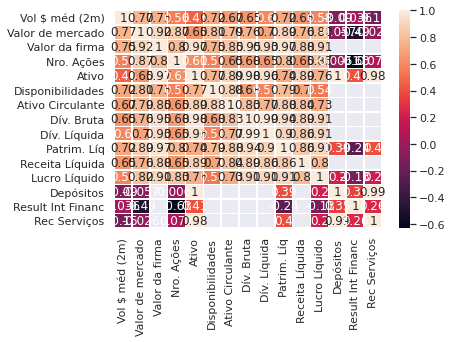

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
#sns.set(figsize=(9, 6))
sns.heatmap(consolidado.corr(), annot = True, linewidths=.5, )